In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import pi, sin, cos, dot

In [3]:
class TF:
    def __init__(self, n, d):
        self.index = n
        self.thickness = d
        
    def matrix(self, w):
        delta = 2*pi*(self.index)*(self.thickness)/w
        ita = self.index
        element = pd.DataFrame(
            {'e1':cos(delta), 'e2':1j/ita*sin(delta), 'e3':1j*ita*sin(delta), 'e4':cos(delta)}
        )
        matrix = np.reshape(element.values.reshape(1,-1), (np.size(w), 2, 2))
        return matrix
    
def Matrix_dot(layer_up, layer_bot): 
    w, _, _ = np.shape(layer_up)
    eq = [dot(layer_up[i], layer_bot[i]) for i in range(w)]
    return eq

def Eq_TF_Matrix(design):
    eq_matrix = Matrix_dot(design[-2], design[-1])
    for i, layer in enumerate(design):
        if i > 2:
            eq_matrix = Matrix_dot(design[-i], eq_matrix)
    return eq_matrix

def Eq_admittance(eq, ns):
    d, _, _ = np.shape(eq)
    eq_y = dot(eq, np.array([[1], [ns]])) 
    Eq_y = pd.DataFrame(np.reshape(eq_y, (d, 2)), columns = ['B','C'])
    Y = Eq_y['C']/Eq_y['B']
    return Y.values.reshape(d, 1)
    
def Reflectance(eq, ns, n0):
    eq_Y = Eq_admittance(eq, ns)
    r = (n0-eq_Y)/(n0+eq_Y)
    R = np.reshape(r*r.conjugate(), np.size(eq_Y))
    return np.real(R)

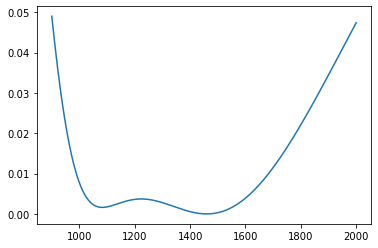

In [13]:
target_w = np.linspace(900,2000, 1000)
layer1 = TF(2.1, 288.67).matrix(target_w)
layer2 = TF(1.42, 223.67).matrix(target_w)
substrate = 1.8
air = 1
tf_matrix = Eq_TF_Matrix([layer2, layer1])
R = Reflectance(tf_matrix, substrate, air)
plt.plot(target_w, R)
plt.show()

In [164]:
def derivate(f1, f2, dx):
    return (f1 - f2)/dx

def FoM(hofx, target):
    merit = sum((hofx-target))
    #print(merit)
    return merit

0.000823335843946893
0.0008233413950620161
0.0008233441706195777
0.0008233275172742083
0.0008233469461771392
0.0008233386195044545
0.0008233386195044545
0.0008233413950620161
0.000823335843946893
0.0008233275172742083


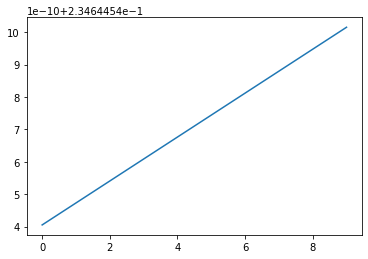

In [123]:
w_target = np.linspace(520, 530)
R_target = np.zeros(np.size(w_target))
m = np.size(w_target)
d = 100 # inital thickness
substrate1 = 1.5
ambient1 = 1.5
step = 10**(-8)
cost = []
costi = []
for i in range(10):
    alpha = 0.0001
    ####
    layer = TF(1.4, d).matrix(w_target)
    layer_dx = TF(1.4, d+step).matrix(w_target)
    R_hofx = Reflectance(layer, substrate1, ambient1)
    R_hofx_dx = Reflectance(layer_dx, substrate1, ambient1)
    J = FoM(R_hofx, R_target)
    J_dx = FoM(R_hofx_dx, R_target)
    ###
    #print(J, J_dx)
    Grad_J = derivate(J, J_dx, step)
    print(Grad_J)
    #print(Grad_J)
    d = d-alpha*Grad_J
    cost.append(J)
    costi.append(i)
    #print(d)
plt.plot(costi, cost)
plt.show()

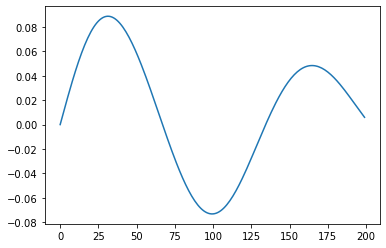

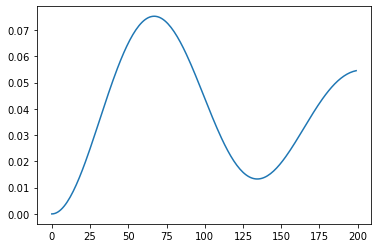

In [166]:
w_target = np.linspace(430, 680)
m = np.size(w_target)
stepi = 10**(-8)
G_J = []
M = []
d_t = []
n1 = 2
for di in range(0, 200):
    layer = TF(n1, di).matrix(w_target)
    layer_fdx = TF(n1, di+stepi).matrix(w_target)
    layer_bdx = TF(n1, di-stepi).matrix(w_target)
    R_hofx = Reflectance(layer, substrate1, ambient1)
    R_hofx_fdx = Reflectance(layer_fdx, substrate1, ambient1)
    R_hofx_bdx = Reflectance(layer_bdx, substrate1, ambient1)
    J = FoM(R_hofx, R_target)
    J_fdx = FoM(R_hofx_fdx, R_target)
    J_bdx = FoM(R_hofx_bdx, R_target)
    
    Grad_J = derivate(J_fdx, J_bdx, 2*stepi)
    
    M.append(J/m)
    G_J.append(Grad_J)
    d_t.append(di)

plt.plot(d_t, G_J)
plt.show()
plt.plot(d_t, M)
plt.show()
    